# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
#Set the API base URL
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key+ "&units=Metric"

#dt = "metric"
#url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={dt}&q="
# De#fine an empty list to fetch the weather data for each city
city_data= []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + city
    city_url = f"{url}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        ##
        weather_response = requests.get(city_url)
        city_weather= weather_response.json()
        #city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | baiyin
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | vanino
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | starobil's'k
Processing Record 8 of Set 1 | yatou
Processing Record 9 of Set 1 | wewak
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | veinticinco de mayo
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ponta delgada
Processing Record 20 of Set 1 | zouerate
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | thompson
Proces

In [5]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?APPID=7e2484f8b38907bd505a85140abd233f&units=Metric&q=tallahassee


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)
# Show Record Count
city_data_df.count()

               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          qaqortoq  60.7167  -46.0333      7.55        79          47   
1            baiyin  36.5583  104.2081     23.05        65          98   
2            bethel  41.3712  -73.4140     23.30        79           0   
3            vanino  49.0869  140.2543     15.81        99         100   
4    puerto natales -51.7236  -72.4875      4.25        81          40   
..              ...      ...       ...       ...       ...         ...   
557   kota kinabalu   5.9749  116.0724     30.99        66          20   
558         taulaga -11.0553 -171.0883     27.79        73          43   
559     shuangcheng  45.3500  126.2833     26.82        60          73   
560          kapa'a  22.0752 -159.3190     29.18        64          20   
561     tallahassee  30.4383  -84.2807     26.85        92         100   

     Wind Speed Country        Date  
0          0.63      GL  1721353748  
1          1.74      CN  1721353748

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,7.55,79,47,0.63,GL,1721353748
1,baiyin,36.5583,104.2081,23.05,65,98,1.74,CN,1721353748
2,bethel,41.3712,-73.4140,23.30,79,0,0.00,US,1721353748
3,vanino,49.0869,140.2543,15.81,99,100,1.84,RU,1721353748
4,puerto natales,-51.7236,-72.4875,4.25,81,40,4.27,CL,1721353749


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,7.55,79,47,0.63,GL,1721353748
1,baiyin,36.5583,104.2081,23.05,65,98,1.74,CN,1721353748
2,bethel,41.3712,-73.4140,23.30,79,0,0.00,US,1721353748
3,vanino,49.0869,140.2543,15.81,99,100,1.84,RU,1721353748
4,puerto natales,-51.7236,-72.4875,4.25,81,40,4.27,CL,1721353749


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

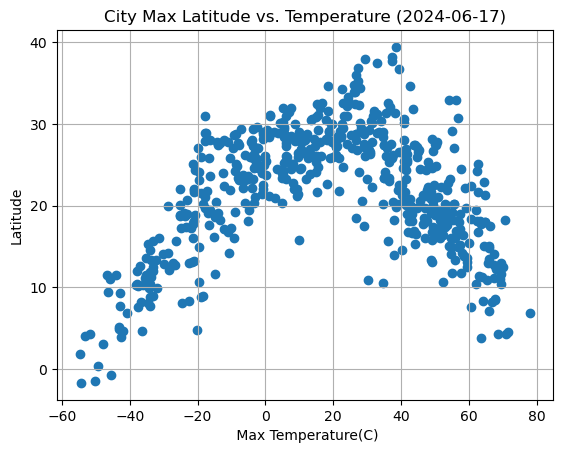

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel(" Max Temperature(C)")
plt.ylabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

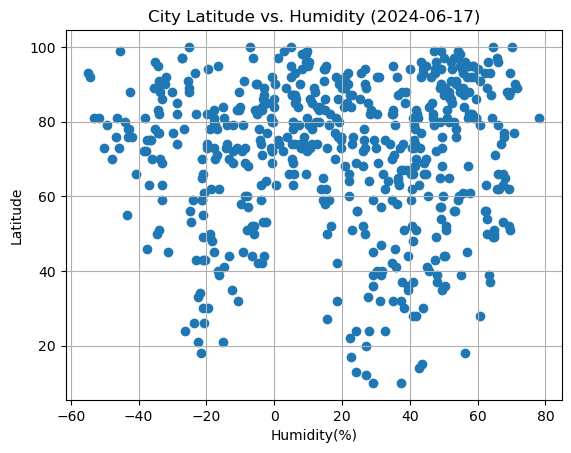

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

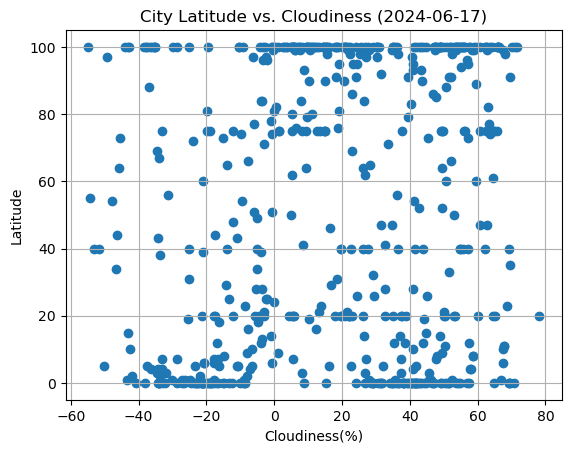

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

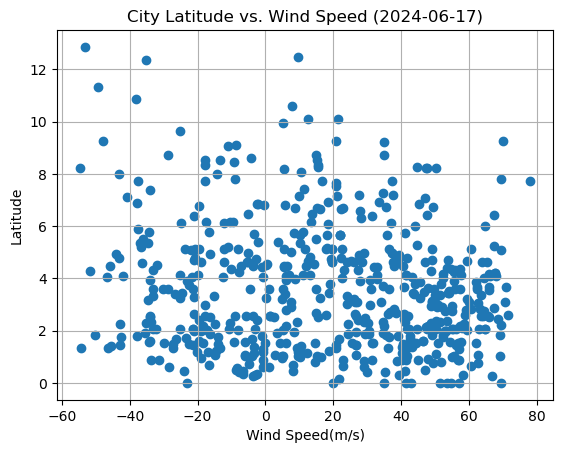

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Wind Speed(m/s)")
plt.ylabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
#def linregress_plot(x,y):
    #(slope,intercept, rvalue, pvalue, stderr) = linregress(x,y)
    #regress = x* slope + intercept
   # eq = (f"y={slope}x + {intercept}")


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,7.55,79,47,0.63,GL,1721353748
1,baiyin,36.5583,104.2081,23.05,65,98,1.74,CN,1721353748
2,bethel,41.3712,-73.4140,23.30,79,0,0.00,US,1721353748
3,vanino,49.0869,140.2543,15.81,99,100,1.84,RU,1721353748
6,starobil's'k,49.2783,38.9107,24.63,57,0,3.15,UA,1721353749


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
souther_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]
# Display sample data
souther_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto natales,-51.7236,-72.4875,4.25,81,40,4.27,CL,1721353749
5,adamstown,-25.0660,-130.1015,22.09,89,100,9.66,PN,1721353749
8,wewak,-3.5534,143.6268,29.37,71,84,4.47,PG,1721353749
11,cidreira,-30.1811,-50.2056,14.02,88,1,3.59,BR,1721353750
12,veinticinco de mayo,-35.4323,-60.1727,11.10,89,100,1.91,AR,1721353750


###  Temperature vs. Latitude Linear Regression Plot

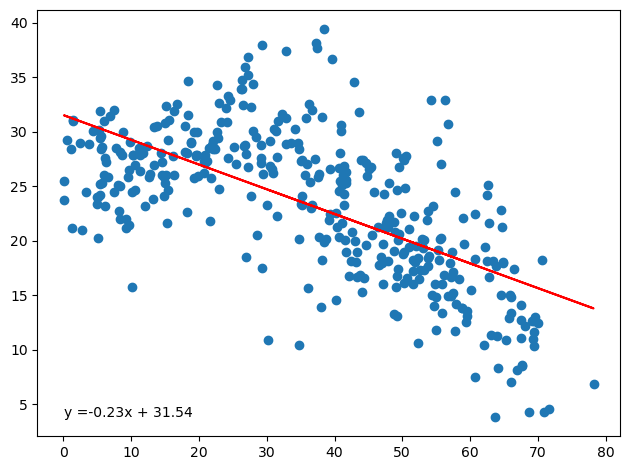

In [30]:
#Linear regression on Northern Hemisphere
x_1 = northern_hemi_df["Lat"]
y_1 = northern_hemi_df["Max Temp"]

slope = linregress(x_1,y_1)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_1, y_1)
regress = x_1 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_1, y_1)
plt.plot(x_1, regress, "r")
plt.annotate(eqtn, (x_1.min(),y_1.min()), fontsize = 10)
plt.tight_layout()



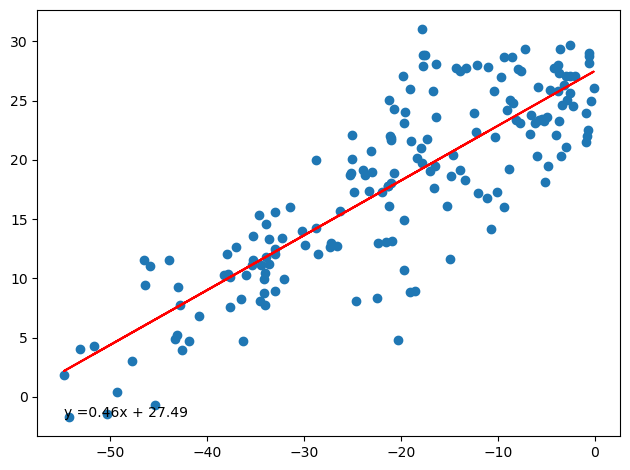

In [31]:
# Linear regression on Southern Hemisphere
x_2 = souther_hemi_df["Lat"]
y_2 = souther_hemi_df["Max Temp"]

slope = linregress(x_2,y_2)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_2, y_2)
regress = x_2 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_2, y_2)
plt.plot(x_2, regress, "r")
plt.annotate(eqtn, (x_2.min(),y_2.min()), fontsize = 10)
plt.tight_layout()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

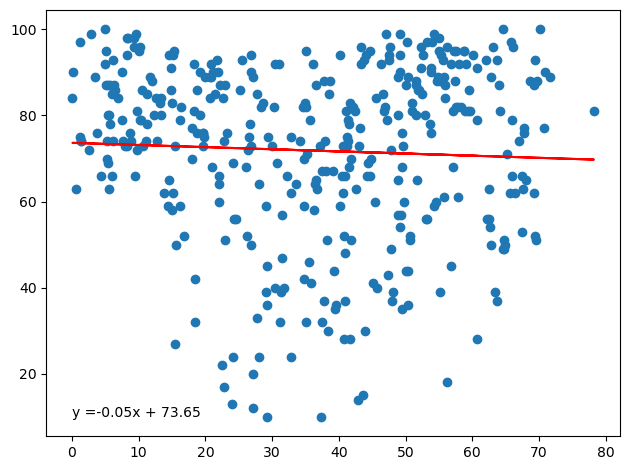

In [33]:
#Northern Hemisphere
x_3= northern_hemi_df["Lat"]
y_3 = northern_hemi_df["Humidity"]

slope = linregress(x_3,y_3)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_3, y_3)
regress = x_3 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_3, y_3)
plt.plot(x_3, regress, "r")
plt.annotate(eqtn, (x_3.min(),y_3.min()), fontsize = 10)
plt.tight_layout()

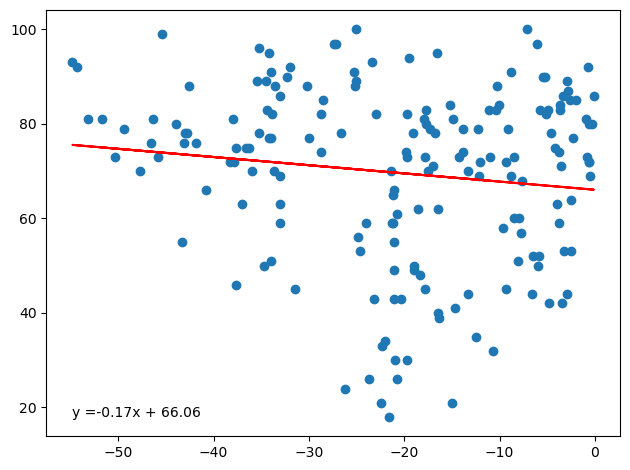

In [34]:
#Southern Hemisphere
x_4= souther_hemi_df["Lat"]
y_4 =souther_hemi_df["Humidity"]

slope = linregress(x_4,y_4)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_4, y_4)
regress = x_4 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_4, y_4)
plt.plot(x_4, regress, "r")
plt.annotate(eqtn, (x_4.min(),y_4.min()), fontsize = 10)
plt.tight_layout()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

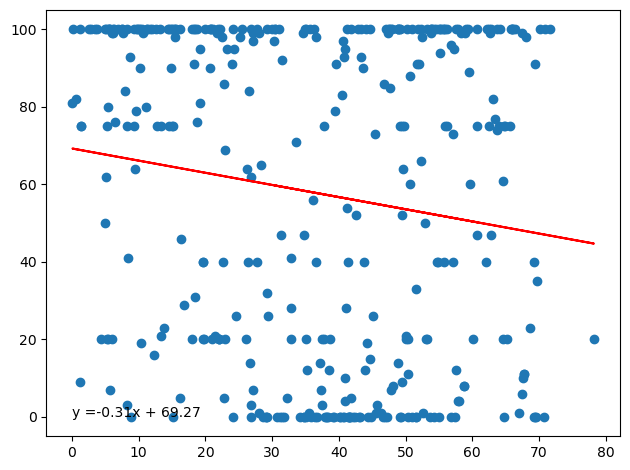

In [35]:
#Northern Hemisphere
x_5= northern_hemi_df["Lat"]
y_5 = northern_hemi_df["Cloudiness"]

slope = linregress(x_5,y_5)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_5, y_5)
regress = x_5 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_5, y_5)
plt.plot(x_5, regress, "r")
plt.annotate(eqtn, (x_5.min(),y_5.min()), fontsize = 10)
plt.tight_layout()

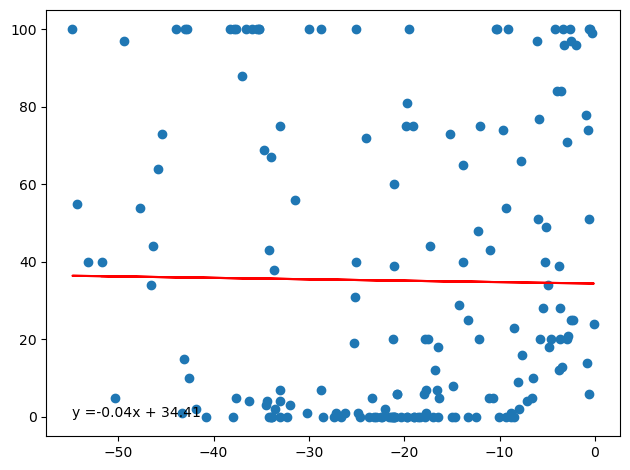

In [36]:
# Southern Hemisphere
x_6= souther_hemi_df["Lat"]
y_6 = souther_hemi_df["Cloudiness"]

slope = linregress(x_6,y_6)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_6, y_6)
regress = x_6 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_6, y_6)
plt.plot(x_6, regress, "r")
plt.annotate(eqtn, (x_6.min(),y_6.min()), fontsize = 10)
plt.tight_layout()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

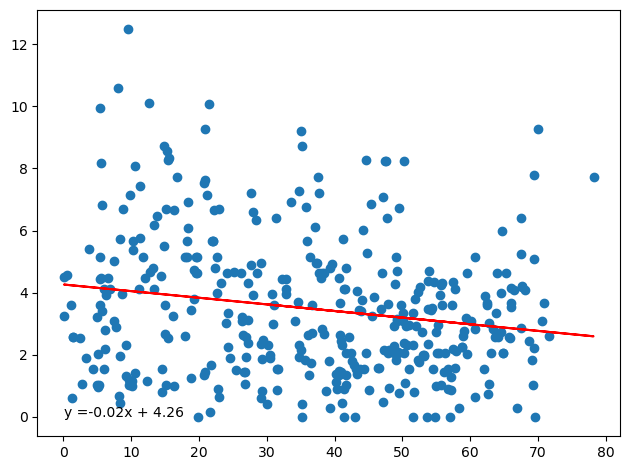

In [37]:
# Northern Hemisphere
x_7= northern_hemi_df["Lat"]
y_7 = northern_hemi_df["Wind Speed"]


slope = linregress(x_7,y_7)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_7, y_7)
regress = x_7 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_7, y_7)
plt.plot(x_7, regress, "r")
plt.annotate(eqtn, (x_7.min(),y_7.min()), fontsize = 10)
plt.tight_layout()

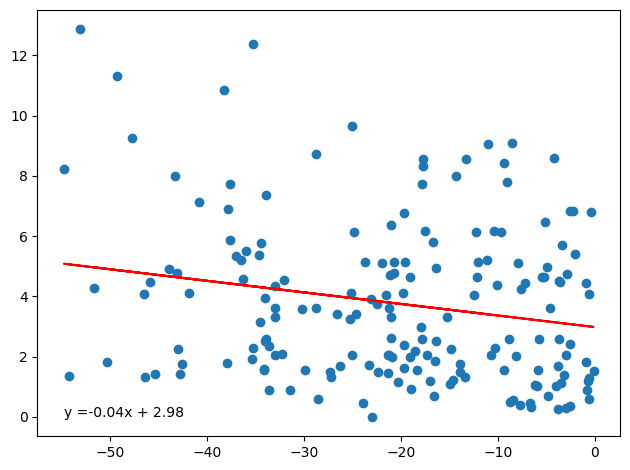

In [38]:
# Southern Hemisphere
x_8= souther_hemi_df["Lat"]
y_8 = souther_hemi_df["Wind Speed"]

slope = linregress(x_8,y_8)
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_8, y_8)
regress = x_8 * slope + intercept
eqtn = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#graph
plt.scatter(x_8, y_8)
plt.plot(x_8, regress, "r")
plt.annotate(eqtn, (x_8.min(),y_8.min()), fontsize = 10)
plt.tight_layout()

**Discussion about the linear relationship:** YOUR RESPONSE HERE